# Tarea #3

In [1]:
import pandas as pd
import numpy as np
import io
import os
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import PercentFormatter, MultipleLocator
import matplotlib.patches as patches
import mpltern
import ternary

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")


In [2]:
def read_list_csv(carpeta, formato='.csv'):
    list_files = []
    for item in carpeta.rglob('*'):
        if item.is_file():
            if str(item).endswith(formato):
                list_files += ['.\\' + str(item)]

    return list_files

ruta_admision = Path('./datos_ext/admision')
ruta_inscripcion = Path('./datos_ext/inscripcion')
ruta_matricula = Path('./datos_ext/matricula')
ruta_postulacion = Path('./datos_ext/postulacion')

list_files_admision = read_list_csv(ruta_admision)
list_files_inscripcion = read_list_csv(ruta_inscripcion)
list_files_matricula = read_list_csv(ruta_matricula)
list_files_postulacion = read_list_csv(ruta_postulacion)

list_files_admision_xlsx = read_list_csv(ruta_admision, formato='.xlsx')
list_files_inscripcion_xlsx = read_list_csv(ruta_inscripcion, formato='.xlsx')
list_files_matricula_xlsx = read_list_csv(ruta_matricula, formato='.xlsx')
list_files_postulacion_xlsx = read_list_csv(ruta_postulacion, formato='.xlsx')

In [3]:
list_admision_2014_2023 = list_files_admision[10:-2]
cols_admision_2014_2023 = [
    ['ID_aux', 'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA']  
]

list_files_matricula_2014_2023 = list_files_matricula[10:]
cols_matricula_2014_2023 = [
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
]

list_files_matricula_xlsx_2014_2023 = list_files_matricula_xlsx[9:]
list_sheet_matricula = [
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - Oferta académica'
]

cols_matricula_xlsx_2014_2023 = [
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO_CARRERA', 'NOMBRE_UNIVERSIDAD'],
    ['CODIGO_CARRERA', 'NOMBRE_UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD']
]

In [4]:
cols_admision = ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA', 'AÑO']
cols_matricula = ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND', 'AÑO', 'UNIVERSIDAD']
df_admision = pd.DataFrame(columns=cols_admision)
df_matricula = pd.DataFrame(columns=cols_matricula)
gdep_map = {1: 'Particular pagado', 2: 'Particular subvencionado', 3: 'Municipal'}

for k in range(len(cols_admision_2014_2023)):
    df = pd.read_csv(list_admision_2014_2023[k], sep=';', low_memory=False)[cols_admision_2014_2023[k]]
    df.columns = cols_admision[:-1]
    df['AÑO'] = 2014 + k
    df_admision = pd.concat([df_admision, df])

    df = pd.read_csv(list_files_matricula_2014_2023[k], sep=';', low_memory=False)[cols_matricula_2014_2023[k]]
    df.columns = cols_matricula[:-2]
    df['AÑO'] = 2014 + k

    df_aux = pd.read_excel(list_files_matricula_xlsx_2014_2023[k], sheet_name=list_sheet_matricula[k])[cols_matricula_xlsx_2014_2023[k]]
    df_aux.columns = ['CODIGO', 'UNIVERSIDAD']
    universidad_map = {df_aux.drop_duplicates('CODIGO').iloc[i]['CODIGO']:df_aux.drop_duplicates('CODIGO').iloc[i]['UNIVERSIDAD']  for i in range(df_aux.drop_duplicates('CODIGO').shape[0])}
    df['UNIVERSIDAD'] = df['CODIGO'].map(universidad_map)
    df = df.dropna()

    df_matricula = pd.concat([df_matricula, df])

df_admision_matricula = df_matricula.merge(df_admision, how='left', on=['ID_aux', 'AÑO'])
df_admision_matricula = df_admision_matricula[~df_admision_matricula['GRUPO_DEPENDENCIA'].isna()]
df_admision_matricula = df_admision_matricula[df_admision_matricula['GRUPO_DEPENDENCIA']>0]
df_admision_matricula = df_admision_matricula[df_admision_matricula['GRUPO_DEPENDENCIA']<4]
df_admision_matricula['GRUPO_DEPENDENCIA'] = df_admision_matricula['GRUPO_DEPENDENCIA'].astype(int)
df_admision_matricula['GRUPO_DEPENDENCIA'] = df_admision_matricula['GRUPO_DEPENDENCIA'].map(gdep_map)
df_admision_matricula['Particular pagado'] = (df_admision_matricula['GRUPO_DEPENDENCIA']=='Particular pagado')*1
df_admision_matricula['Municipal'] = (df_admision_matricula['GRUPO_DEPENDENCIA']=='Municipal')*1
df_admision_matricula['Particular subvencionado'] = (df_admision_matricula['GRUPO_DEPENDENCIA']=='Particular subvencionado')*1
df_admision_matricula['PTJE_POND'] = df_admision_matricula['PTJE_POND'].astype(str).str.replace(',', '.').astype(float)
df_admision_matricula['PROMEDIO_NOTAS'] = df_admision_matricula['PROMEDIO_NOTAS'].astype(str).str.replace(',', '.').astype(float)
df_admision_matricula['PTJE_NEM'] = df_admision_matricula['PTJE_NEM'].astype(str).str.replace(',', '.').astype(float)
df_admision_matricula['PTJE_RANKING'] = df_admision_matricula['PTJE_RANKING'].astype(str).str.replace(',', '.').astype(float)

df_admision_matricula['UNIVERSIDAD'] = df_admision_matricula['UNIVERSIDAD']\
    .apply(lambda x: 'UNIVERSIDAD ADOLFO IBAÑEZ' if x=='UNIVERSIDAD ADOLFO IBAÃ‘EZ' else x)\
    .apply(lambda x: 'UNIVERSIDAD DE LAS AMERICAS' if x=='UNIVERSIDAD DE LAS AMÃ‰RICAS' else x)

df_admision_matricula['PROMEDIO_NOTAS'] = df_admision_matricula['PROMEDIO_NOTAS'].apply(lambda x: x/100 if x>100 else x)
df_admision_matricula = df_admision_matricula[df_admision_matricula['PROMEDIO_NOTAS']>0]

In [5]:
df_admision_matricula_group = df_admision_matricula.groupby(['AÑO', 'UNIVERSIDAD'], as_index=False)[['Particular pagado', 'Municipal', 'Particular subvencionado','PROMEDIO_NOTAS']].mean().sort_values(['UNIVERSIDAD', 'AÑO'])
df_admision_matricula_group_sum = df_admision_matricula.groupby(['AÑO', 'UNIVERSIDAD'], as_index=False)[['Particular pagado', 'Municipal', 'Particular subvencionado','PROMEDIO_NOTAS']].sum().sort_values(['UNIVERSIDAD', 'AÑO'])

In [7]:
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:001A47-33.3:004C70-66.6:DDDD00-100:990000
    (0.000, (0.000, 0.102, 0.278)),
    (0.333, (0.000, 0.298, 0.439)),
    (0.666, (0.867, 0.867, 0.000)),
    (1.000, (0.600, 0.000, 0.000))))


#my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
#    # Edit this gradient at https://eltos.github.io/gradient/#0:00BFC4-33:00BA38-66:B7D135-100:F8766D
#    (0.000, (0.000, 0.749, 0.769)),
#    (0.330, (0.000, 0.729, 0.220)),
#    (0.660, (0.718, 0.820, 0.208)),
#    (1.000, (0.973, 0.463, 0.427))))


gris_null = "#B5B4A6"
my_gradient.set_bad(gris_null)

In [8]:
def rgba_to_hex(rgba):
    r, g, b, a = rgba  # Extraemos los valores de RGBA
    return '#{:02x}{:02x}{:02x}{:02x}'.format(int(r * 255), int(g * 255), int(b * 255), int(a * 255))

rgba_to_hex(my_gradient(0))

'#001a46ff'

In [9]:
aux = dict({(i, j, k): k for i, j, k in ternary.helpers.simplex_iterator(100)})

In [10]:
my_gradient(0)[:-1]

(0.0, 0.102, 0.278)

In [47]:
df_admision_mean_uni = df_admision_matricula_group.groupby('UNIVERSIDAD').mean()
df_admision_mean_uni.columns = df_admision_mean_uni.columns.str.replace(' ', '_')
unis_municipal = df_admision_mean_uni.query('Municipal >= 0.5').index.tolist()
unis_pp = df_admision_mean_uni.query('Particular_pagado >= 0.5').index.tolist()
unis_ps = df_admision_mean_uni.query('Particular_subvencionado >= 0.5').index.tolist()
unis_all = df_admision_mean_uni[~df_admision_mean_uni.index.isin(unis_municipal + unis_pp + unis_ps)].index.tolist()

In [302]:
my_gradient(0.25)

(0.0, 0.24972419478301833, 0.39934487428605075, 1.0)

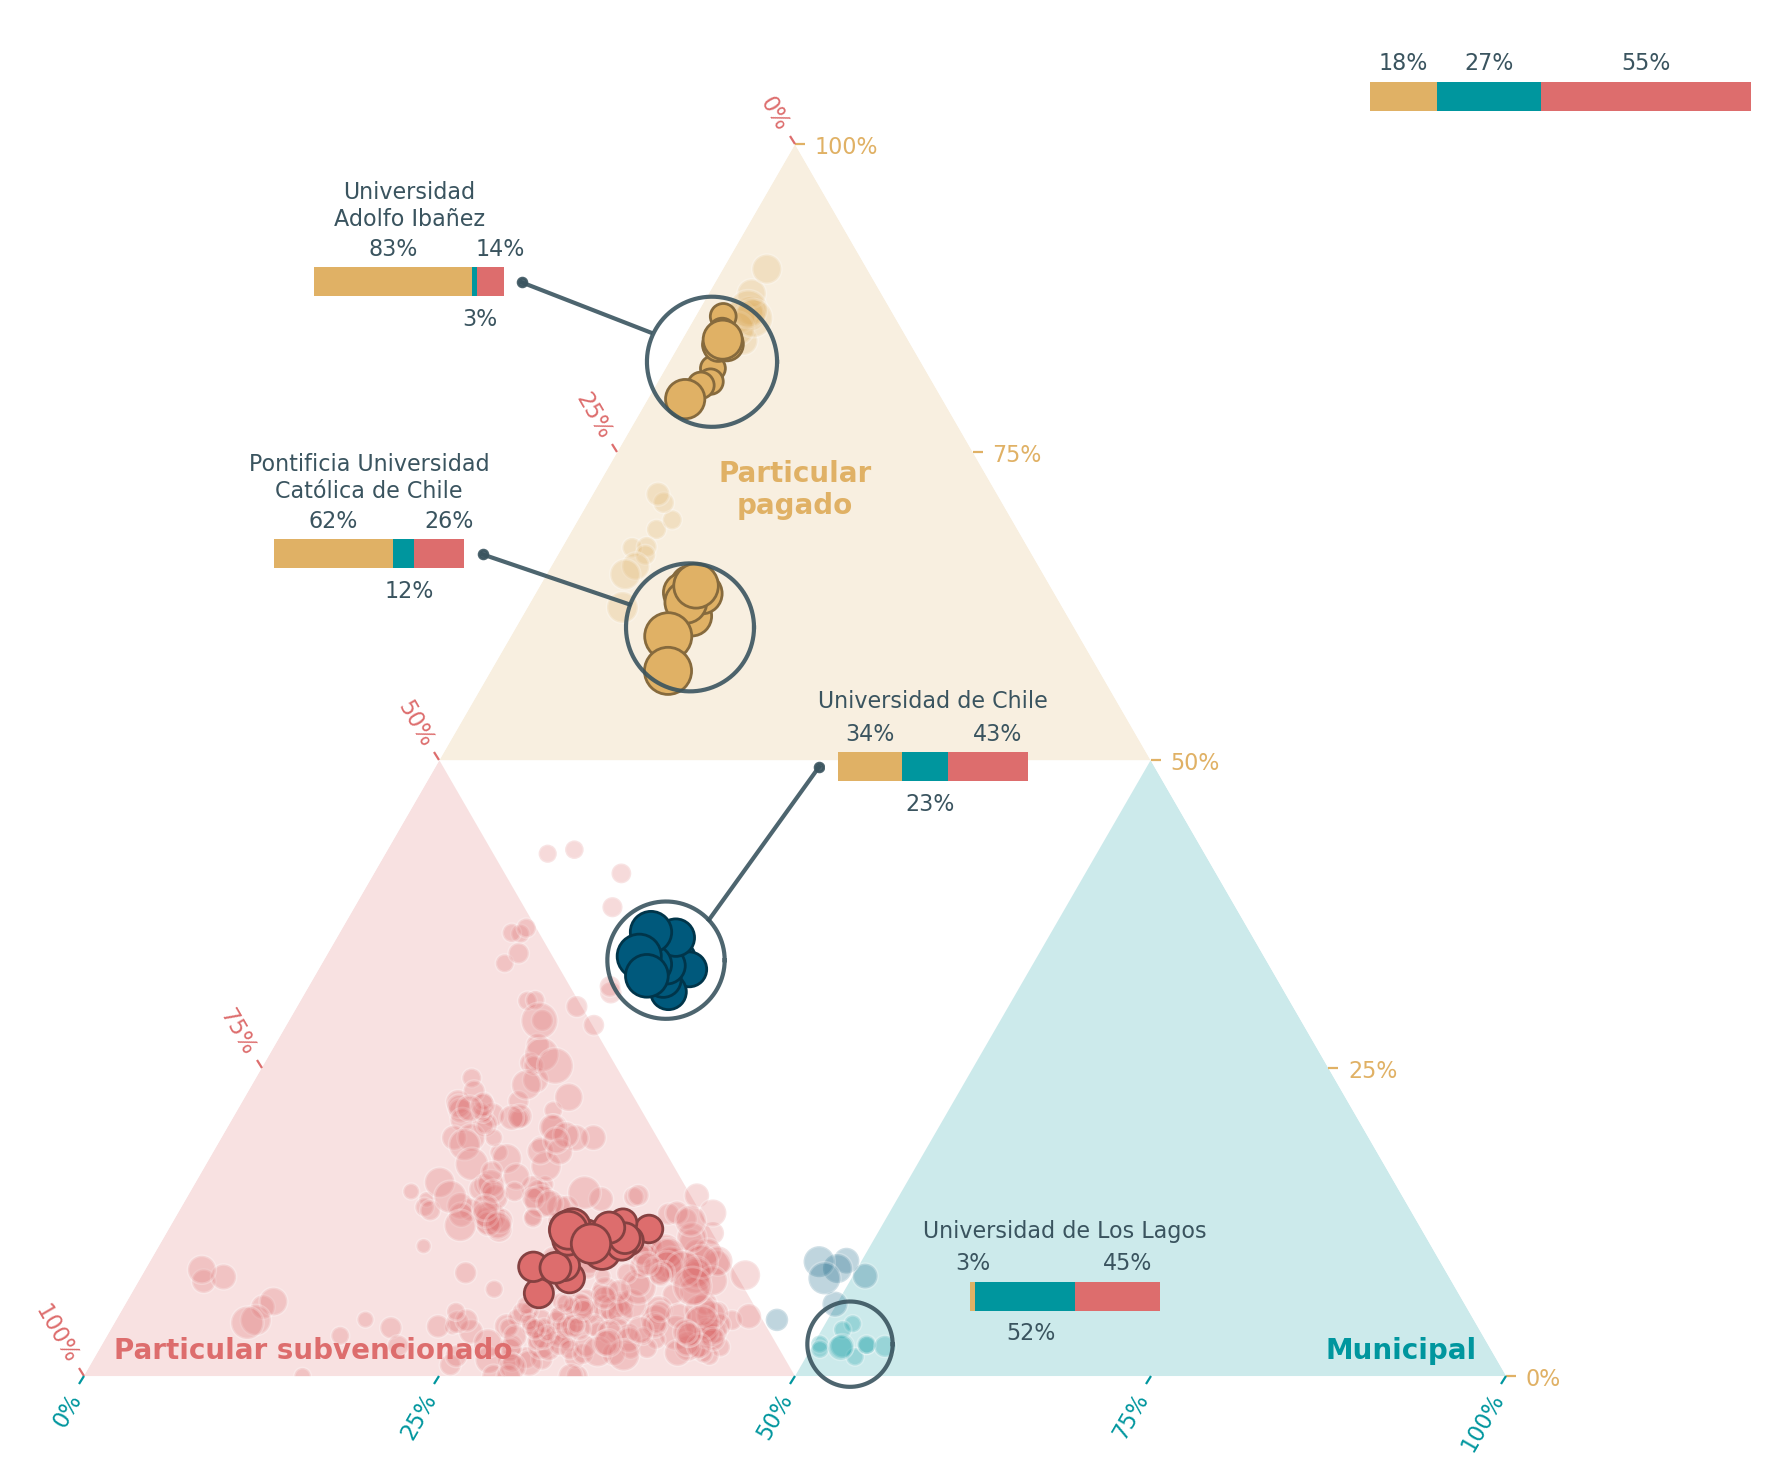

In [307]:
# Definicion de colores
col_blue_1 = (20,110,160,255)
col_cyan_1 = (50,192,210,255)
col_yellow_1 = (224,177,101,255)
col_wine_1 = (151,60,76,255)
col_green_1 = (0,150,158,255)
col_wine_2 = (171,138,149,255)

col_salmon_1 = (221,109,109,255)
col_yellow_2 = (237,162,34,255)
col_green_2 = (180,187,60,255)
col_wine_3 = (155,97,128,255)
col_gray_1 = (130,129,116,255)
col_blue_2 = (0,89,124,255)

col_black = (3,2,8,255)
col_white = (225,232,234,255)
col_gray_text = (58,84,95,255)
col_gray = (170,190,199,255)
col_gray_dark = (108,135,147,255)


colorGen_1 = tuple([i/255 for i in col_blue_2]) #my_gradient(0.25)
colorPP_1 = tuple([i/255 for i in col_yellow_1]) #my_gradient(0.7)
colorMun_1 = tuple([i/255 for i in col_green_1]) #my_gradient(0.5)
colorPS_1 = tuple([i/255 for i in col_salmon_1])# my_gradient(0.999)

#colorGen_1 = mod_color_op(my_gradient(0.25), intensidad=.9, alpha=1.)
#colorPP_1 = mod_color_op(my_gradient(0.7), intensidad=.9, alpha=1.)
#colorMun_1 = mod_color_op(my_gradient(0.5), intensidad=.9, alpha=1.)
#colorPS_1 = mod_color_op(my_gradient(0.999), intensidad=.9, alpha=1.)

colorBlack = tuple([i/255 for i in col_black])
colorWhite= tuple([i/255 for i in col_white])
colorGrayText = tuple([i/255 for i in col_gray_text])
colorGray = tuple([i/255 for i in col_gray])
colorGrayDark = tuple([i/255 for i in col_gray_dark])


# Funciones
def for_uni_scatter(df_admision_matricula_group, tax, uni, color, edgecolor='w', alpha=1.0):
    for k in range(len(uni)):
        data = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD']==uni[k]][['Municipal', 'Particular pagado', 'Particular subvencionado']]
        data_size = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD']==uni[k]]['PROMEDIO_NOTAS']-4
        tax.scatter(data['Particular pagado'], data['Particular subvencionado'], data['Municipal'], color=color, s=np.exp(data_size*2.2), edgecolor=edgecolor, alpha=alpha)

def barh_grupo_dep(fig, df, uni, pos=[0.6, 0.85, 0.1, 0.01], pos_text=[[0,0,0],[0,0,0]], 
                   text_title=None, pos_title=[0,0], ha_title='center', va_title='center', 
                   color=[colorPP_1, colorMun_1, colorPS_1], stext=10):
    df = df[df['UNIVERSIDAD'].isin(uni)].drop(columns='UNIVERSIDAD')
    df['AÑO'] = df['AÑO'].astype(int)
    df = df.set_index('AÑO')
    df = pd.DataFrame(df.mean()).T

    if text_title==None:
        text_title=uni[0]
        text_title = text_title.title()

    df_pp = int(np.round(df['Particular pagado'] * 100))
    df_ps = int(np.round(df['Particular subvencionado'] * 100))
    df_m = 100 - df_pp - df_ps

    bar_ax = fig.add_axes(pos)
    bar_ax.barh(df.index, df['Particular pagado'], label='Particular pagado', color=color[0])
    bar_ax.text(df['Particular pagado'].values[0]*0.5 + pos_text[0][0], pos_text[1][0], 
                f"{df_pp}%",
                ha='center', va='bottom', fontsize=stext, color=colorGrayText)#color[0], weight=900)
    bar_ax.barh(df.index, df['Municipal'], left=df['Particular pagado'] ,label='Municipal', color=color[1])
    bar_ax.text(df['Municipal'].values[0]*0.5 + df['Particular pagado'].values[0] + pos_text[0][1], pos_text[1][1], 
                f"{df_m}%", 
                ha='center', va='top', fontsize=stext, color=colorGrayText)#color[1], weight=900)
    bar_ax.barh(df.index, df['Particular subvencionado'], left=df['Particular pagado']+df['Municipal'],label='Particular subvencionado', color=color[2])
    bar_ax.text(df['Particular subvencionado'].values[0]*0.5 + df['Particular pagado'].values[0] + df['Municipal'].values[0] + pos_text[0][2], pos_text[1][2], 
            f"{df_ps}%", 
            ha='center', va='bottom', fontsize=stext, color=colorGrayText)#color[1], weight=900)
    
    bar_ax.text(0.5+pos_title[0], 1.8+pos_title[1], text_title, ha=ha_title, va=va_title, fontsize=stext, color=colorGrayText)#color[1], weight=900)
    bar_ax.set_axis_off()

def drawCircle(fig, pos=[0.6, 0.85, 0.1, 0.01], color='k', alpha=0.9):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = np.cos(theta)
    y = np.sin(theta)
    circle_ax = fig.add_axes(pos)
    circle_ax.plot(x, y, color=color, alpha=alpha)
    circle_ax.fill(x, y, color='#ffffff', alpha=0.)  # Para rellenar el círculo
    circle_ax.set_xlim(-1.5, 1.5)
    circle_ax.set_ylim(-1.5, 1.5)
    circle_ax.set_aspect('equal', adjustable='box')
    circle_ax.set_axis_off()

def drawLine(fig, pos=[0.6, 0.85, 0.5, 0.5], points=[[0,0], [10,10]],color='k', alpha=0.9, margin=0.1, point_size=10):
    line_ax = fig.add_axes(pos)
    line_ax.plot(points[0], points[1], color=color, alpha=alpha)
    line_ax.scatter(points[0][-1], points[1][-1], color=color, alpha=alpha, s=point_size)

    line_ax.set_xlim(np.min(points[0])-margin, np.max(points[0])+margin)
    line_ax.set_ylim(np.min(points[1])-margin, np.max(points[1])+margin)
    #line_ax.set_aspect('equal', adjustable='box')
    line_ax.set_axis_off()

def mod_color_op(color, intensidad=1., alpha=1.):
    return (color[0] * intensidad, color[1] * intensidad, color[2] * intensidad, alpha)

fig, ax = plt.subplots(1,figsize=(10,8), dpi=200)

tax = fig.add_subplot(111, projection='ternary', ternary_sum=100.0)

#tax.set_axis_off()
tax.spines[:].set_visible(False)
tax.spines[:].set_color(colorGrayText)
tax.tick_params(axis='t', colors=colorPP_1, labelsize=8)
tax.tick_params(axis='r', colors=colorMun_1, labelsize=8)
tax.tick_params(axis='l', colors=colorPS_1, labelsize=8)

#tax.set_tlabel('Top')
#tax.set_llabel('Left')
#tax.set_rlabel('Right')

tax.text(0.3, 0.5, 30, 'Municipal', size=10, fontweight='bold', ha='right', va='bottom', rotation=0, color=rgba_to_hex(colorMun_1))
tax.text(0.3, 30, 0.5, 'Particular subvencionado', size=10, fontweight='bold', ha='left', va='bottom', rotation=0, color=rgba_to_hex(colorPS_1))
tax.text(36, 7., 7., 'Particular\npagado', size=10, fontweight='bold', ha='center', va='center', rotation=0, color=rgba_to_hex(colorPP_1))


tax.axtspan(50.0, 100.0, alpha=0.2, fc=rgba_to_hex(colorPP_1))
tax.axlspan(50.0, 100.0, alpha=0.2, fc=rgba_to_hex(colorPS_1))
tax.axrspan(50.0, 100.0, alpha=0.2, fc=rgba_to_hex(colorMun_1))

tax.taxis.set_major_formatter(PercentFormatter())
tax.laxis.set_major_formatter(PercentFormatter())
tax.raxis.set_major_formatter(PercentFormatter())

tax.taxis.set_major_locator(MultipleLocator(25))
tax.laxis.set_major_locator(MultipleLocator(25))
tax.raxis.set_major_locator(MultipleLocator(25))

# Filtro colores universidades
df_admision_mean_uni = df_admision_matricula_group.groupby('UNIVERSIDAD').mean()
df_admision_mean_uni.columns = df_admision_mean_uni.columns.str.replace(' ', '_')
unis_municipal = df_admision_mean_uni.query('Municipal >= 0.5').index.tolist()
unis_pp = df_admision_mean_uni.query('Particular_pagado >= 0.5').index.tolist()
unis_ps = df_admision_mean_uni.query('Particular_subvencionado >= 0.5').index.tolist()
unis_all = df_admision_mean_uni[~df_admision_mean_uni.index.isin(unis_municipal + unis_pp + unis_ps)].index.tolist()

# Universidades top chile de acuerdo a QS World University Rankings

uni_top = ['PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE', 'UNIVERSIDAD DE CHILE', 'UNIVERSIDAD DE SANTIAGO DE CHILE', 'UNIVERSIDAD ADOLFO IBAÑEZ', 'UNIVERSIDAD DE CONCEPCION']
unis_pp_top = list(set(uni_top) & set(unis_pp))
unis_ps_top = list(set(uni_top) & set(unis_ps))
unis_all_top = list(set(uni_top) & set(unis_all))

for_uni_scatter(df_admision_matricula_group, tax, unis_municipal, rgba_to_hex(colorMun_1), alpha=0.25)
for_uni_scatter(df_admision_matricula_group, tax, unis_pp, rgba_to_hex(colorPP_1), alpha=0.25)
for_uni_scatter(df_admision_matricula_group, tax, unis_ps, rgba_to_hex(colorPS_1), alpha=0.25)
for_uni_scatter(df_admision_matricula_group, tax, unis_all, rgba_to_hex(colorGen_1), alpha=0.25)

for_uni_scatter(df_admision_matricula_group, tax, unis_pp_top, rgba_to_hex(colorPP_1), edgecolor=mod_color_op(colorPP_1, intensidad=0.6))
for_uni_scatter(df_admision_matricula_group, tax, unis_ps_top, rgba_to_hex(colorPS_1), edgecolor=mod_color_op(colorPS_1, intensidad=0.6))
for_uni_scatter(df_admision_matricula_group, tax, unis_all_top, rgba_to_hex(colorGen_1), edgecolor=mod_color_op(colorGen_1, intensidad=0.6))

# Universidades Top - Grupo heterogeneo
barh_grupo_dep(fig, df_admision_matricula_group, ['UNIVERSIDAD DE CHILE'], 
               pos=[0.534, 0.481, 0.1, 0.02], pos_text=[[0,0.03,0.05],[0.6,-0.7,0.6]],
               text_title='Universidad de Chile', pos_title=[0,0], ha_title='center', va_title='center', 
               color=[colorPP_1, colorMun_1, colorPS_1], stext=8)
drawCircle(fig, pos=[0.393, 0.315, 0.11, 0.11], color=colorGrayText, alpha=0.9)
drawLine(fig, pos=[0.467, 0.378, 0.06, 0.13], points=[[0,20], [5,10]],color=colorGrayText, alpha=0.9, margin=0.9, point_size=10)

# Universidades Top - mayor ingreso colegio particular pagado
barh_grupo_dep(fig, df_admision_matricula_group, ['PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE'], 
               pos=[0.252, 0.614, 0.1, 0.02], pos_text=[[0,0.03,0.05],[0.6,-0.7,0.6]],
               text_title='Pontificia Universidad\nCatólica de Chile', pos_title=[0,0.3], ha_title='center', va_title='center', 
               color=[colorPP_1, colorMun_1, colorPS_1], stext=8)
drawCircle(fig, pos=[0.4, 0.518, 0.12, 0.12], color=colorGrayText, alpha=0.9)
drawLine(fig, pos=[0.353, 0.583, 0.08, 0.05], points=[[20,0], [5,8]],color=colorGrayText, alpha=0.9, margin=0.9, point_size=10)

barh_grupo_dep(fig, df_admision_matricula_group, ['UNIVERSIDAD ADOLFO IBAÑEZ'], 
               pos=[0.272, 0.784, 0.1, 0.02], pos_text=[[0,0.03,0.05],[0.6,-0.7,0.6]],
               text_title='Universidad\nAdolfo Ibañez', pos_title=[0,0.3], ha_title='center', va_title='center', 
               color=[colorPP_1, colorMun_1, colorPS_1], stext=8)
drawCircle(fig, pos=[0.41, 0.683, 0.122, 0.122], color=colorGrayText, alpha=0.9)
drawLine(fig, pos=[0.373, 0.753, 0.07, 0.05], points=[[20,0], [5,8]],color=colorGrayText, alpha=0.9, margin=0.9, point_size=10)

# Universidades Top - mayor ingreso colegio particular subvemcionado


# Casos Particulares
barh_grupo_dep(fig, df_admision_matricula_group, ['UNIVERSIDAD DE LOS LAGOS'], 
               pos=[0.6, 0.15, 0.1, 0.02], pos_text=[[0,0.03,0.05],[0.6,-0.7,0.6]], ha_title='center', va_title='center', 
               text_title='Universidad de Los Lagos', pos_title=[0,0],
               color=[colorPP_1, colorMun_1, colorPS_1], stext=8)
drawCircle(fig, pos=[0.5, 0.09, 0.08, 0.08], color=colorGrayText, alpha=0.9)


# Anotacion general
barh_grupo_dep(fig, df_admision_matricula_group, unis_municipal + unis_pp + unis_ps + unis_all, 
               pos=[0.8, 0.9, 0.2, 0.02], pos_text=[[0,0.0,0.0],[0.6,1.25,0.6]], ha_title='center', va_title='center', 
               text_title=' ', pos_title=[0,0],
               color=[colorPP_1, colorMun_1, colorPS_1], stext=8)

ax.set_axis_off()

plt.show()

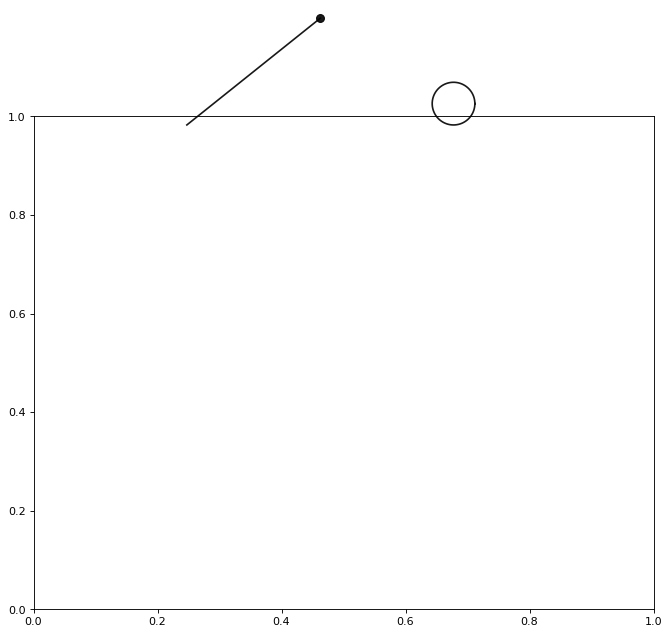

In [179]:
def drawCircle(fig, pos=[0.6, 0.85, 0.1, 0.01], color='k', alpha=0.9):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = np.cos(theta)
    y = np.sin(theta)
    circle_ax = fig.add_axes(pos)
    circle_ax.plot(x, y, color=color, alpha=alpha)
    circle_ax.fill(x, y, color='#ffffff', alpha=0.)  # Para rellenar el círculo
    circle_ax.set_xlim(-1.5, 1.5)
    circle_ax.set_ylim(-1.5, 1.5)
    circle_ax.set_aspect('equal', adjustable='box')
    circle_ax.set_axis_off()

def drawLine(fig, pos=[0.6, 0.85, 0.5, 0.5], points=[[0,0], [10,10]],color='k', alpha=0.9, margin=0.1):
    line_ax = fig.add_axes(pos)
    line_ax.plot(points[0], points[1], color=color, alpha=alpha)
    line_ax.scatter(points[0][-1], points[1][-1], color=color, alpha=alpha, s=50)

    line_ax.set_xlim(np.min(points[0])-margin, np.max(points[0])+margin)
    line_ax.set_ylim(np.min(points[1])-margin, np.max(points[1])+margin)
    #line_ax.set_aspect('equal', adjustable='box')
    line_ax.set_axis_off()
drawLine(fig, pos=[0.3, 0.85, 0.2, 0.2], points=[[0,1], [9,10]],color='k', alpha=0.9)

fig, ax = plt.subplots(1,figsize=(10,8), dpi=80)

drawCircle(fig, pos=[0.6, 0.85, 0.1, 0.1], color='k', alpha=0.9)
drawLine(fig, pos=[0.3, 0.85, 0.2, 0.2], points=[[0,1], [9,10]],color='k', alpha=0.9)

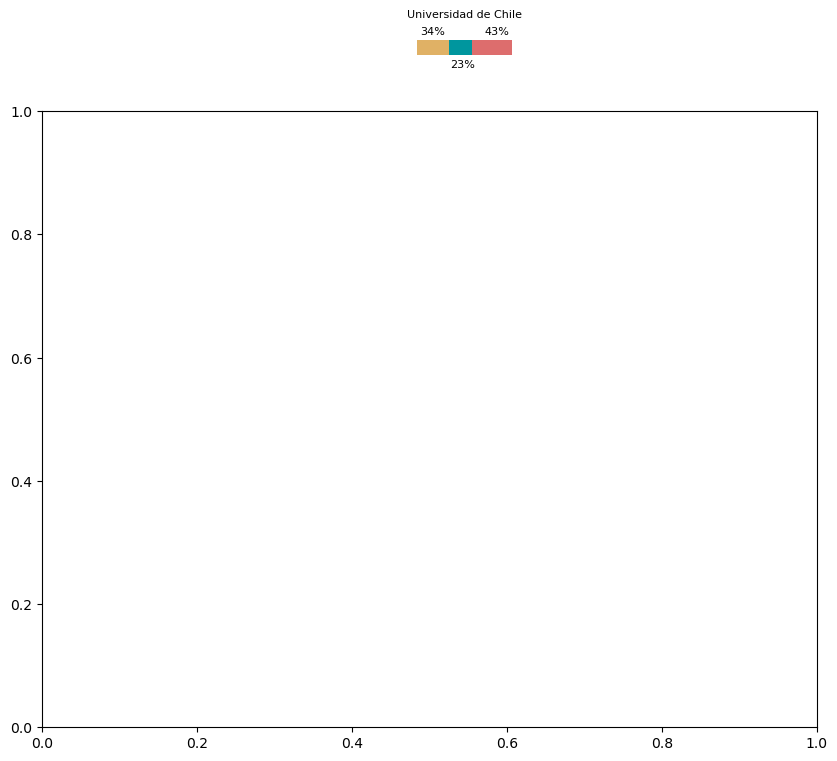

In [16]:
fig, ax = plt.subplots(1,figsize=(10,8), dpi=100)

def barh_grupo_dep(fig, df, uni, pos=[0.6, 0.85, 0.1, 0.01], pos_text=[[0,0,0],[0,0,0]], 
                   text_title=None, pos_title=[0,0], ha_title='center', va_title='center', 
                   color=[colorPP_1, colorMun_1, colorPS_1], stext=10):
    df = df[df['UNIVERSIDAD'].isin(uni)].drop(columns='UNIVERSIDAD')
    df['AÑO'] = df['AÑO'].astype(int)
    df = df.set_index('AÑO')
    df = pd.DataFrame(df.mean()).T

    if text_title==None:
        text_title=uni[0]
        text_title = text_title.title()

    df_pp = int(np.round(df['Particular pagado'] * 100))
    df_ps = int(np.round(df['Particular subvencionado'] * 100))
    df_m = 100 - df_pp - df_ps

    bar_ax = fig.add_axes(pos)
    bar_ax.barh(df.index, df['Particular pagado'], label='Particular pagado', color=color[0])
    bar_ax.text(df['Particular pagado'].values[0]*0.5 + pos_text[0][0], pos_text[1][0], 
                f"{df_pp}%",
                ha='center', va='bottom', fontsize=stext, color='k')#color[0], weight=900)
    bar_ax.barh(df.index, df['Municipal'], left=df['Particular pagado'] ,label='Municipal', color=color[1])
    bar_ax.text(df['Municipal'].values[0]*0.5 + df['Particular pagado'].values[0] + pos_text[0][1], pos_text[1][1], 
                f"{df_m}%", 
                ha='center', va='top', fontsize=stext, color='k')#color[1], weight=900)
    bar_ax.barh(df.index, df['Particular subvencionado'], left=df['Particular pagado']+df['Municipal'],label='Particular subvencionado', color=color[2])
    bar_ax.text(df['Particular subvencionado'].values[0]*0.5 + df['Particular pagado'].values[0] + df['Municipal'].values[0] + pos_text[0][2], pos_text[1][2], 
            f"{df_ps}%", 
            ha='center', va='bottom', fontsize=stext, color='k')#color[1], weight=900)
    
    bar_ax.text(0.5+pos_title[0], 1.8+pos_title[1], text_title, ha=ha_title, va=va_title, fontsize=stext, color='k')#color[1], weight=900)
    bar_ax.set_axis_off()

barh_grupo_dep(fig, df_admision_matricula_group, ['UNIVERSIDAD DE CHILE'], 
               pos=[0.5, 0.95, 0.1, 0.02], pos_text=[[0,0.03,0.05],[0.6,-0.7,0.6]], 
               text_title='Universidad de Chile', pos_title=[0,0], ha_title='center', va_title='center', 
               color=[colorPP_1, colorMun_1, colorPS_1], stext=8)


In [17]:
df_admision_matricula_group_sum[df_admision_matricula_group_sum['UNIVERSIDAD']=='UNIVERSIDAD DEL DESARROLLO']

,AÑO,UNIVERSIDAD,Particular pagado,Municipal,Particular subvencionado,PROMEDIO_NOTAS
26,2014,UNIVERSIDAD DEL DESARROLLO,1712,147,632,14346.19
59,2015,UNIVERSIDAD DEL DESARROLLO,1796,171,617,14857.36
92,2016,UNIVERSIDAD DEL DESARROLLO,1704,125,705,14624.05
128,2017,UNIVERSIDAD DEL DESARROLLO,1728,152,687,14842.06
166,2018,UNIVERSIDAD DEL DESARROLLO,1648,152,672,14290.65
207,2019,UNIVERSIDAD DEL DESARROLLO,1759,132,590,14437.35
248,2020,UNIVERSIDAD DEL DESARROLLO,1832,117,610,15156.31
289,2021,UNIVERSIDAD DEL DESARROLLO,1474,133,635,13624.88
333,2022,UNIVERSIDAD DEL DESARROLLO,1590,135,718,15057.58
378,2023,UNIVERSIDAD DEL DESARROLLO,1955,209,969,19391.75


In [18]:
df_admision_matricula_group

,AÑO,UNIVERSIDAD,Particular pagado,Municipal,Particular subvencionado,PROMEDIO_NOTAS
0,2014,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,0.632733,0.108965,0.258303,6.384667
33,2015,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,0.642028,0.105286,0.252686,6.397774
66,2016,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,0.636042,0.103305,0.260653,6.408763
99,2017,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,0.636673,0.110578,0.252749,6.422771
135,2018,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,0.616939,0.118961,0.264100,6.418926
...,...,...,...,...,...,...
214,2019,UNIVERSIDAD TECNOLOGICA METROPOLITANA,0.056992,0.314924,0.628085,5.616627
255,2020,UNIVERSIDAD TECNOLOGICA METROPOLITANA,0.060716,0.304797,0.634487,5.614287
298,2021,UNIVERSIDAD TECNOLOGICA METROPOLITANA,0.059187,0.309187,0.631625,5.691193
343,2022,UNIVERSIDAD TECNOLOGICA METROPOLITANA,0.054000,0.324000,0.622000,5.793830


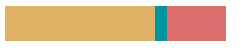

In [19]:
fig, ax = plt.subplots(1,figsize=(6,1), dpi=50)

df__ = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD']=='UNIVERSIDAD DEL DESARROLLO'].drop(columns='UNIVERSIDAD')
#df__ = df_admision_matricula_group.sort_values('AÑO')

df__['AÑO'] = df__['AÑO'].astype(int)
df__ = df__.set_index('AÑO')
df__ = pd.DataFrame(df__.mean()).T
#plt.stackplot(df__.index, df__[df__.columns[1:-1]].T, labels=df__.columns[1:-1], colors=[colorPP_1, colorMun_1, colorBlue_1], alpha=0.9)
ax.barh(df__.index, df__['Particular pagado'], label='Particular pagado', color=colorPP_1)
ax.barh(df__.index, df__['Municipal'], left=df__['Particular pagado'] ,label='Municipal', color=colorMun_1)
ax.barh(df__.index, df__['Particular subvencionado'], left=df__['Particular pagado']+df__['Municipal'],label='Particular subvencionado', color=colorPS_1)
ax.set_axis_off()


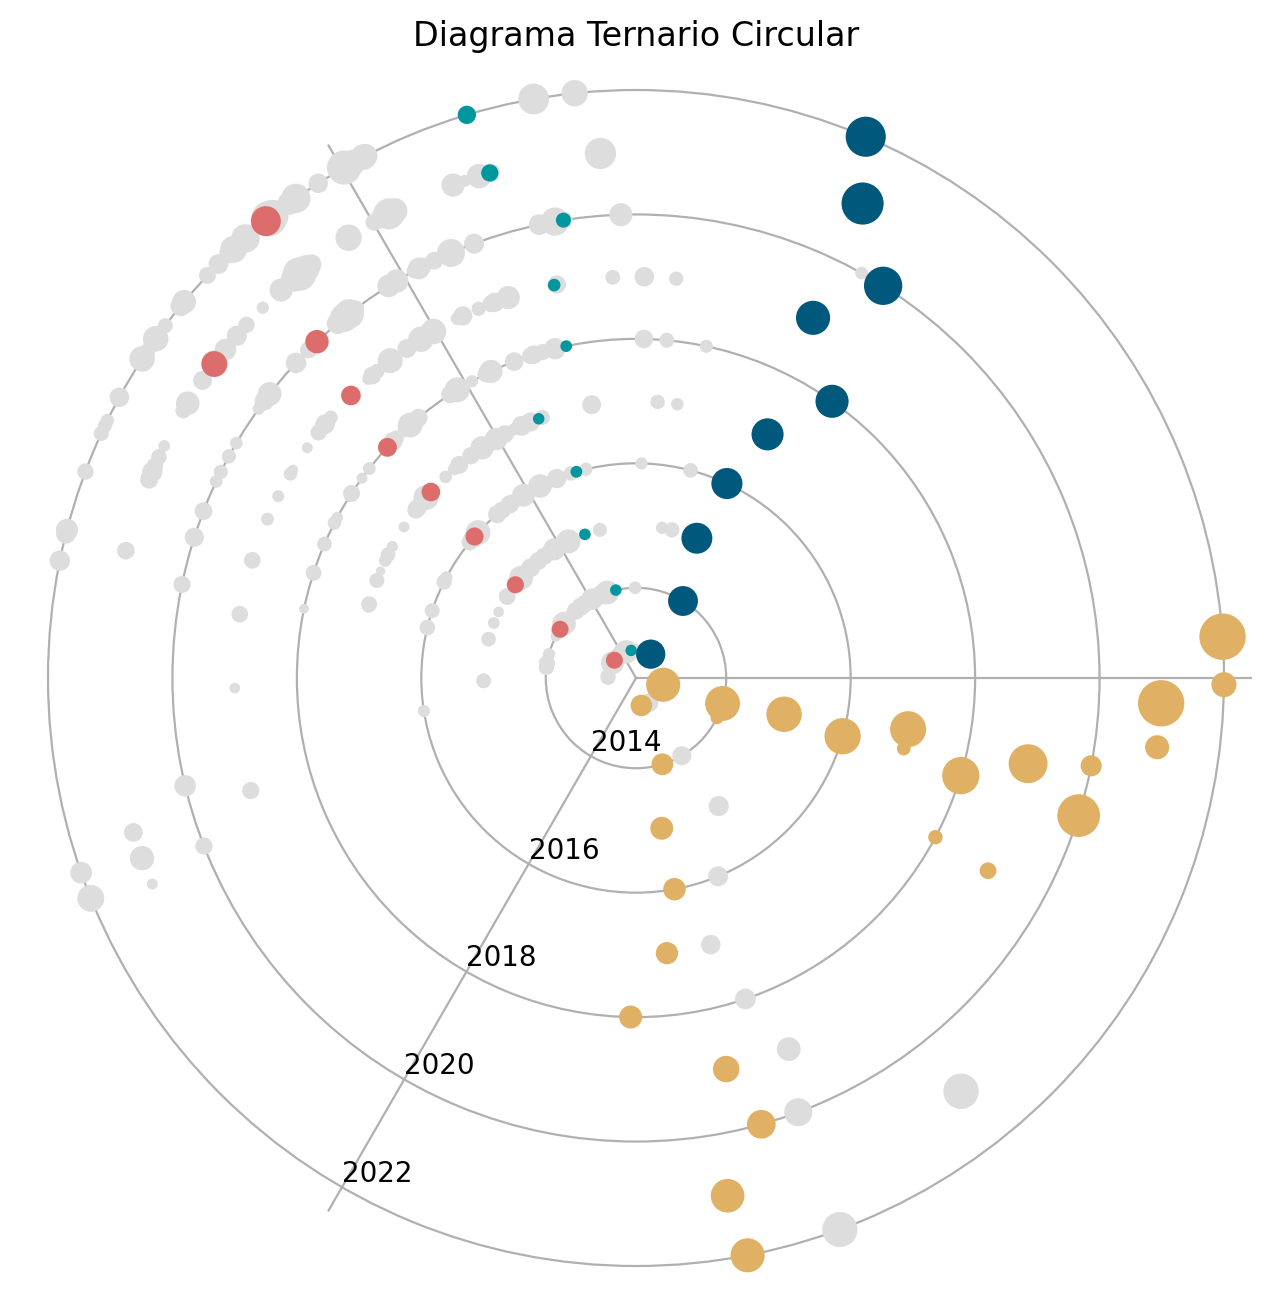

In [20]:
# Datos de ejemplo (A, B, C) que suman 1
#data = df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)][['Municipal', 'Particular pagado', 'Particular subvencionado']]\
#    .apply(lambda x: (x['Municipal'], x['Particular pagado'], x['Particular subvencionado']), axis=1).tolist()

# Convertir las tripletas a ángulos (en radianes)
# Puedes asignar a cada eje (A, B, C) un ángulo, por ejemplo: A -> 0°, B -> 120°, C -> 240°
angles = np.array([0, -2*np.pi/3, 4*np.pi/3])

# Función para proyectar en coordenadas polares
def ternary_to_polar(triplet):
    return np.dot(triplet, angles)

def scatter_ternary(data_angles, data_radius, ax, color, size):
    polar_angles = np.apply_along_axis(ternary_to_polar, 1, data_angles)
    ax.scatter(polar_angles, data_radius, color=color, s=size)

# Graficar en coordenadas polares
fig = plt.figure(figsize=(10,8), dpi=200)
ax = fig.add_subplot(111, polar=True)

ax.set_thetagrids(range(0, 360, 120), labels=[]) 
ax.set_rgrids([k*2 for k in range(7)], angle=-120, labels=[k*2 +2012 if k>0 else "" for k in range(7)]) 
ax.set_axisbelow(True)

uni = ['PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE', 'UNIVERSIDAD DE LA FRONTERA', 'UNIVERSIDAD DEL DESARROLLO', 'UNIVERSIDAD DE LOS ANDES', 'UNIVERSIDAD DE LOS LAGOS', 'UNIVERSIDAD DE CHILE']
col_uni = [
    rgba_to_hex(colorPP_1),
    rgba_to_hex(colorPS_1), 
    rgba_to_hex(colorPP_1), 
    rgba_to_hex(colorPP_1), 
    rgba_to_hex(colorMun_1), 
    rgba_to_hex(colorGen_1), 
    ]

data_angles = df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)][['Municipal', 'Particular pagado', 'Particular subvencionado']]\
    .apply(lambda x: (x['Municipal'], x['Particular pagado'], x['Particular subvencionado']), axis=1).tolist()

data_radius = df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['AÑO']-2013
data_size = df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['PROMEDIO_NOTAS']-5

scatter_ternary(data_angles, data_radius, ax, color='#dddddd', size=np.exp(data_size*3.5))

for k in range(len(uni)):
    data_angles = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD']==uni[k]][['Municipal', 'Particular pagado', 'Particular subvencionado']]\
        .apply(lambda x: (x['Municipal'], x['Particular pagado'], x['Particular subvencionado']), axis=1).tolist()

    data_radius = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD']==uni[k]]['AÑO']-2013
    data_size = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD']==uni[k]]['PROMEDIO_NOTAS']-5

    scatter_ternary(data_angles, data_radius, ax, color=col_uni[k], size=np.exp(data_size*3.5))


ax.set_title("Diagrama Ternario Circular")

ax.spines[:].set_visible(False)

# Mostrar gráfico
plt.show()

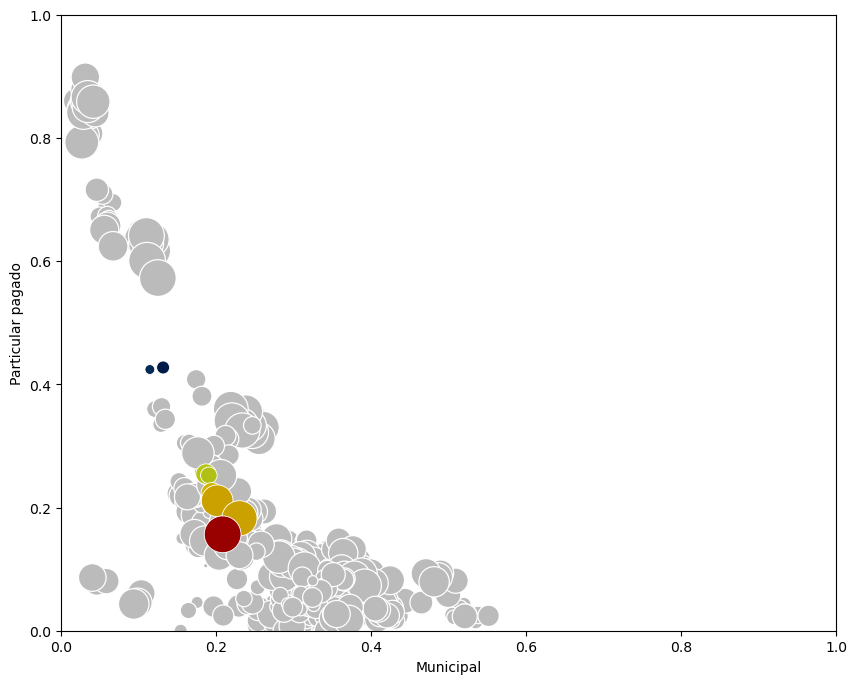

In [21]:
fig, ax = plt.subplots(figsize=(10,8))

uni = ['UNIVERSIDAD FINIS TERRAE']

color_uni = df_admision_matricula_group['UNIVERSIDAD'].isin(uni)
color_size_map = {k: 2*(k-2013) for k in df_admision_matricula_group['AÑO'].unique()}

sns.scatterplot(x=df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['Municipal'],
                y=df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['Particular pagado'], 
                color = '#BBBBBB',
                size=df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['PROMEDIO_NOTAS'],
                sizes=(10, 700),
                legend=False,
                ax=ax
                )

sns.scatterplot(x=df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['Municipal'],
                y=df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['Particular pagado'], 
                hue=df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['Particular subvencionado'],
                palette=my_gradient,
                size=df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['PROMEDIO_NOTAS'],
                sizes=(50, 700),
                legend=False,
                
                ax=ax
                )
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()